# 1. Data Understanding and Preprocessing
Before diving into the machine learning model, it's crucial to preprocess and understand the data.

1.1. Loading the Dataset and Understanding it and its values

In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (4424, 35)


In [ ]:
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

Null values in each column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                       

# 2. Data Cleaning and Preparing

In [ ]:
df['Target'] = df['Target'].map({'Dropout' : 0, 'Enrolled': 2, 'Graduate': 1})
print(df["Target"].unique())

[0 1 2]


In [ ]:
df.columns=df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")

In [ ]:
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification', 'nacionality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation', 'displaced',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)

In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime/evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   nacionality                                     4424 non-null   int64  
 7   mother's_qualification                          4424 non-null   int64  
 8   father's_qualification                          4424 non-null   int64  
 9   mother's_occupation                      

# 3. Exploratory Data Analysis (EDA)

In [ ]:
# Display summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       marital_status  application_mode  application_order       course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       daytime/evening_attendance  previous_qualification  nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min     

In [ ]:
corr = df.corr(method='spearman')['target'].sort_values(ascending=False)
print("Correlation:")
print(corr)

Correlation:
target                                            1.000000
curricular_units_2nd_sem_(approved)               0.374350
tuition_fees_up_to_date                           0.358649
curricular_units_2nd_sem_(grade)                  0.342133
curricular_units_1st_sem_(approved)               0.330500
curricular_units_1st_sem_(grade)                  0.285433
curricular_units_2nd_sem_(evaluations)            0.182367
scholarship_holder                                0.132795
curricular_units_1st_sem_(evaluations)            0.124560
curricular_units_2nd_sem_(enrolled)               0.091566
curricular_units_1st_sem_(enrolled)               0.087924
displaced                                         0.076395
daytime/evening_attendance                        0.069293
gdp                                               0.046600
application_order                                 0.044462
father's_occupation                               0.030943
mother's_occupation                        

In [ ]:
import matplotlib.pyplot as plt

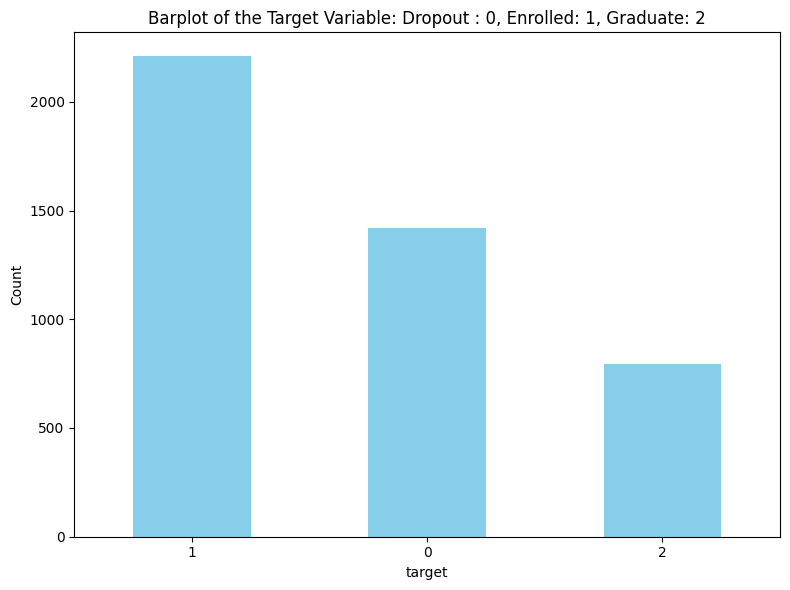

In [ ]:
status_counts = df['target'].value_counts()

# Plotting the histogram
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Barplot of the Target Variable: Dropout : 0, Enrolled: 1, Graduate: 2')
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

**Demographic Exploration**

0    20
1    19
2    19
3    20
4    45
Name: age_at_enrollment, dtype: int64
count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: age_at_enrollment, dtype: float64


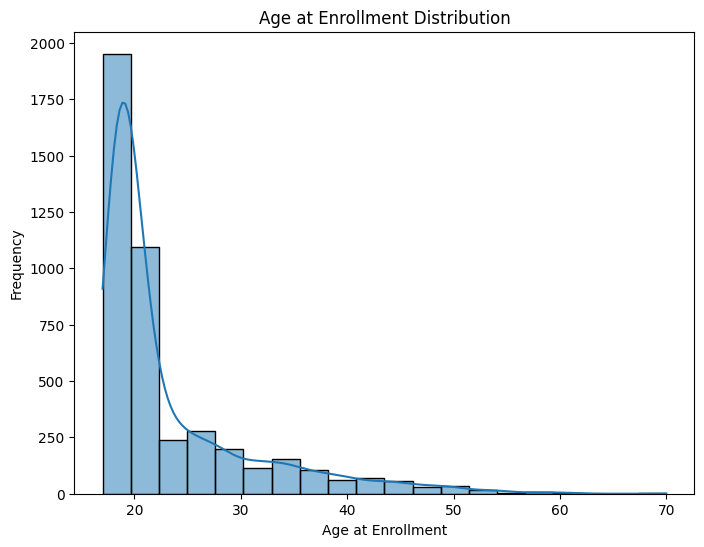

In [ ]:
import seaborn as sns
import numpy as np

print(df['age_at_enrollment'].head())


print(df['age_at_enrollment'].describe())


plt.figure(figsize=(8, 6))
sns.histplot(df['age_at_enrollment'], bins=20, kde=True)
plt.title('Age at Enrollment Distribution')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

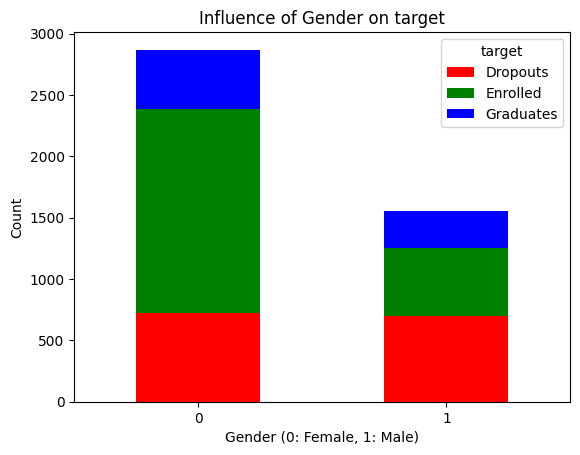

In [ ]:
counts = df.groupby(['gender', 'target']).size().reset_index(name='Count')

# Pivot the data
pivot_counts = counts.pivot(index='gender', columns='target', values='Count').fillna(0)

plt.figure(figsize=(8, 6))
pivot_counts.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'])

plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='target', labels=['Dropouts', 'Enrolled', 'Graduates'])
plt.title('Influence of Gender on target')
plt.xticks(rotation=0)
plt.show()

Scholorship Holder relationship

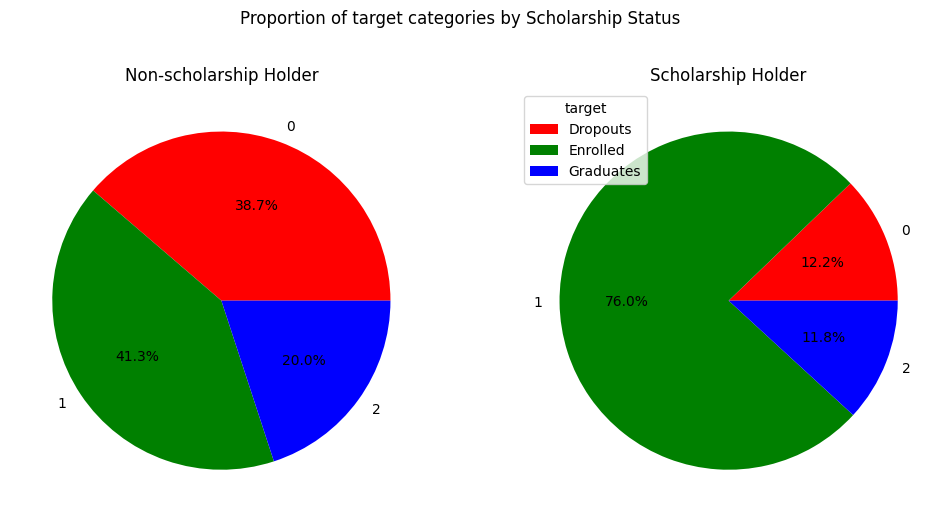

In [ ]:
import matplotlib.pyplot as plt

scholarship_status_labels = {0: 'non_scholarship_holder', 1: 'scholarship_holder'}
grouped = df.groupby(['scholarship_holder', 'target']).size().unstack()
grouped.rename(index=scholarship_status_labels, inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#non-scholarship holders
axs[0].pie(grouped.loc['non_scholarship_holder'], labels=grouped.columns, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
axs[0].set_title('Non-scholarship Holder')

#scholarship holders
axs[1].pie(grouped.loc['scholarship_holder'], labels=grouped.columns, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
axs[1].set_title('Scholarship Holder')

plt.suptitle('Proportion of target categories by Scholarship Status')
plt.legend(title='target', labels=['Dropouts', 'Enrolled', 'Graduates'])
plt.show()

# Scaling and fitting spliting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
filtered_df = df[df['target'] != 2]
X = filtered_df.drop(['target'], axis=1)
y = filtered_df['target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  3630 non-null   int64  
 1   application_mode                                3630 non-null   int64  
 2   application_order                               3630 non-null   int64  
 3   course                                          3630 non-null   int64  
 4   daytime/evening_attendance                      3630 non-null   int64  
 5   previous_qualification                          3630 non-null   int64  
 6   nacionality                                     3630 non-null   int64  
 7   mother's_qualification                          3630 non-null   int64  
 8   father's_qualification                          3630 non-null   int64  
 9   mother's_occupation                           

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop(['curricular_units_1st_sem_(grade)', 'curricular_units_2nd_sem_(grade)', 'unemployment_rate', 'inflation_rate', 'gdp'
],axis=1)
X_test = X_test.drop(['curricular_units_1st_sem_(grade)', 'curricular_units_2nd_sem_(grade)', 'unemployment_rate', 'inflation_rate', 'gdp'
],axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# 4. Naive Bayes Classifier to compare different Models

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Define the models and their paramenters for GridSearchCV

models_params = {
    'GaussianNB': {},
    'MultinomialNB': {'alpha': [0.1, 0.5, 1.0]},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }
}

best_models = {}

#GridSearchCV
for model_name, params in models_params.items():
    if model_name == 'GaussianNB':
        model = GaussianNB()
    elif model_name == 'MultinomialNB':
        model = MultinomialNB()
    elif model_name == 'BernoulliNB':
        model = BernoulliNB()
    elif model_name == 'KNeighborsClassifier':
        model = KNeighborsClassifier()
    elif model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier()
    elif model_name == 'LogisticRegression':
        model = LogisticRegression()

    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")

#Evaluate the performance
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}, Accuracy: {accuracy}")


Model: GaussianNB
Best Parameters: {}
Model: MultinomialNB
Best Parameters: {'alpha': 1.0}
Model: BernoulliNB
Best Parameters: {'alpha': 0.1}
Model: KNeighborsClassifier
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Model: DecisionTreeClassifier
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model: LogisticRegression
Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Model: GaussianNB, Accuracy: 0.8471074380165289
Model: MultinomialNB, Accuracy: 0.8250688705234159
Model: BernoulliNB, Accuracy: 0.8457300275482094
Model: KNeighborsClassifier, Accuracy: 0.8168044077134986
Model: DecisionTreeClassifier, Accuracy: 0.8842975206611571
Model: LogisticRegression, Accuracy: 0.9132231404958677


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Performance Eval
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

#Function for Model performance

def evaluate_model(model, model_name, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Store evaluation metrics in a list
    metrics_list = [accuracy, precision, recall, f1, cm]

    return metrics_list

best_models.items()

dict_items([('GaussianNB', GaussianNB()), ('MultinomialNB', MultinomialNB()), ('BernoulliNB', BernoulliNB(alpha=0.1)), ('KNeighborsClassifier', KNeighborsClassifier(weights='distance')), ('DecisionTreeClassifier', DecisionTreeClassifier(criterion='entropy', max_depth=10)), ('LogisticRegression', LogisticRegression(C=1))])

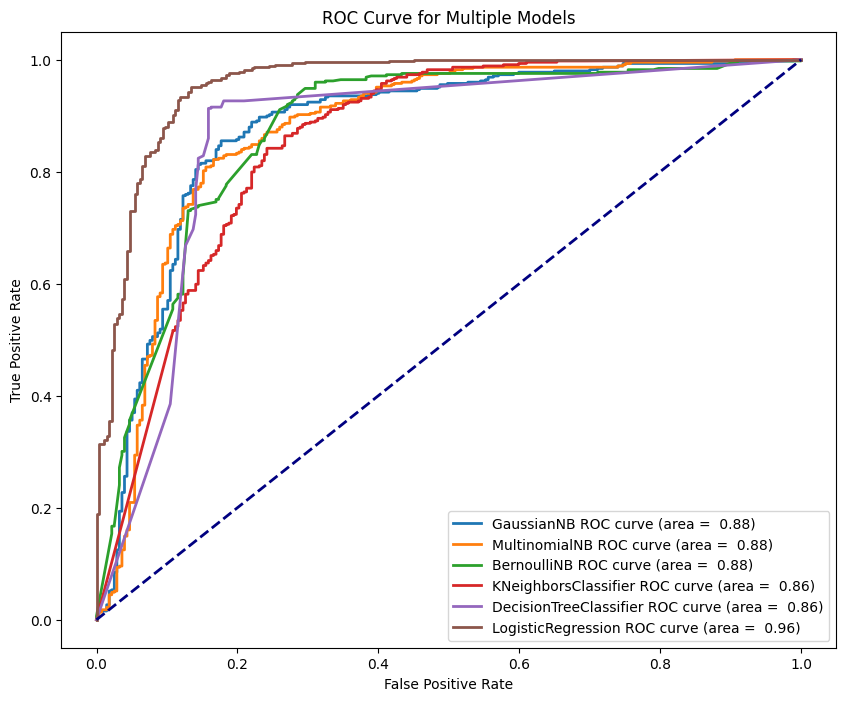

In [ ]:
import matplotlib.pyplot as plt

#empty dict to store evaluation metrics
eval_summary = {}

#figure
plt.figure(figsize=(10,8))

#Loop through each model in the best_models dict and evaluate
for model_name, model in best_models.items():
    # Evaluate the model
    metrics_list = evaluate_model(model, model_name, X_test, y_test)

    # Store evaluation metrics in eval_summary dict
    eval_summary[model_name] = {
        'Accuracy': f"{metrics_list[0]:.2f}",
        'Precision': f"{metrics_list[1]:.2f}",
        'Recall': f"{metrics_list[2]:.2f}",
        'F1-Score': f"{metrics_list[3]:.2f}"
}

    #Obtain probabilities for the ROC Curve
    y_probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    #plot ROC curve for each model on the same figure
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc: .2f})')
#Add diagonal line
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title ('ROC Curve for Multiple Models')
plt.legend()

In [ ]:
pd.DataFrame(eval_summary).T

,Accuracy,Precision,Recall,F1-Score
GaussianNB,0.85,0.87,0.89,0.88
MultinomialNB,0.83,0.85,0.88,0.86
BernoulliNB,0.85,0.82,0.96,0.89
KNeighborsClassifier,0.82,0.81,0.92,0.86
DecisionTreeClassifier,0.88,0.90,0.91,0.91
LogisticRegression,0.91,0.91,0.96,0.93


# 5. Another way of Comparing Models

In [ ]:
def classification_model_evaluation(X, y, score):
    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Define models to evaluate
    models = {
        'LR': LogisticRegression(),
        'DT': DecisionTreeClassifier(),
        'NN': MLPClassifier(),
        'NB': GaussianNB(),
        'KNN': KNeighborsClassifier()
    }

    results = []
    names = []
    roc_data = []

    # Stratified KFold ensures that each fold is a good representative of the whole
    skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    # Evaluate each model
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring=score)
        results.append(cv_scores)
        names.append(name)

        # Fit model and calculate ROC curve
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        roc_data.append((fpr, tpr, auc_score))

    # Plotting CV results as a box plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(results, labels=names, patch_artist=True, showmeans=True)
    ax.set_title('Model Cross-Validation Results')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Models')
    plt.grid(True)
    plt.show()

    # Plotting ROC Curves
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, (fpr, tpr, auc_score) in enumerate(roc_data):
        ax.plot(fpr, tpr, label=f"{names[i]}, AUC={auc_score:.3f}")
    ax.plot([0, 1], [0, 1], color='orange', linestyle='--')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title('ROC Curve Analysis')
    ax.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Displaying the summary table
    summary_data = {
        'Model': names,
        'Mean CV Score': [np.mean(score) for score in results],
        'Standard Deviation': [np.std(score) for score in results],
        'AUC Score': [data[2] for data in roc_data]
    }
    summary_df = pd.DataFrame(summary_data)
    print(summary_df)

# Example usage:
# classification_model_evaluation(X, y, 'accuracy')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

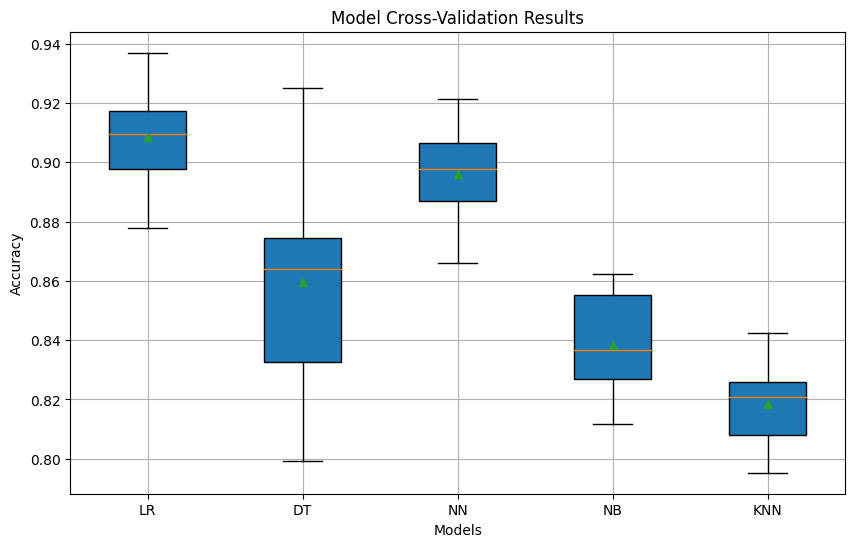

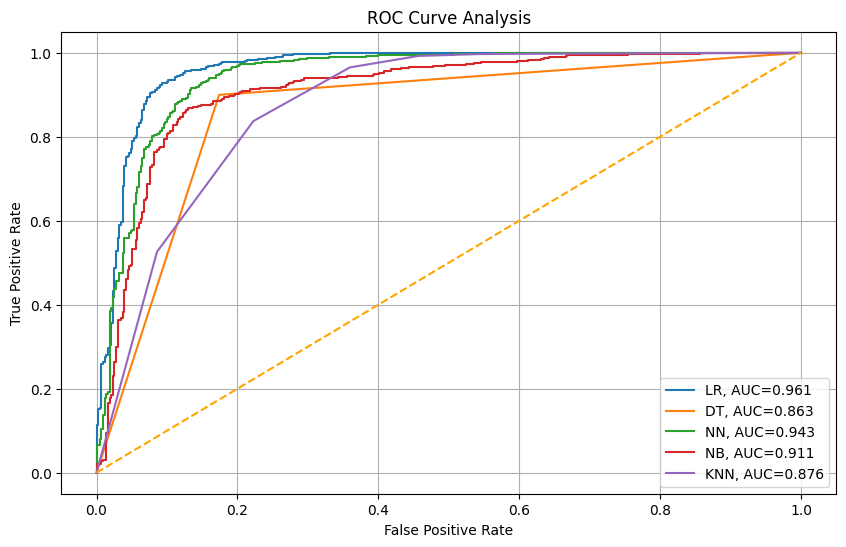

  Model  Mean CV Score  Standard Deviation  AUC Score
0    LR       0.908697            0.017591   0.961389
1    DT       0.859498            0.035890   0.862841
2    NN       0.896103            0.015374   0.943466
3    NB       0.838263            0.017709   0.911061
4   KNN       0.818573            0.014800   0.876383


In [ ]:
classification_model_evaluation(X, y, 'accuracy')

# 6. Doing Linear Regression and finding Coefficients

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9132231404958677


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-Squared: {r2:.2f}")

Mean Absolute Error: 0.09
Mean Squared Error: 0.09
Root Mean Squared Error: 0.29
R-Squared: 0.63


In [ ]:
corr = filtered_df.corr(method='spearman')['target'].abs().sort_values(ascending=False)
top_10_corr = corr[1:11]  # Exclude the correlation with itself ('target') and select the top 10
print("Top 10 Correlations (absolute values):")
print(top_10_corr)

Top 10 Correlations (absolute values):
curricular_units_2nd_sem_(approved)    0.672831
curricular_units_1st_sem_(approved)    0.616451
curricular_units_2nd_sem_(grade)       0.587241
curricular_units_1st_sem_(grade)       0.523679
tuition_fees_up_to_date                0.442138
age_at_enrollment                      0.315083
scholarship_holder                     0.313018
debtor                                 0.267207
curricular_units_2nd_sem_(enrolled)    0.252826
gender                                 0.251955
Name: target, dtype: float64


<ipython-input-33-8b866449b8f5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)


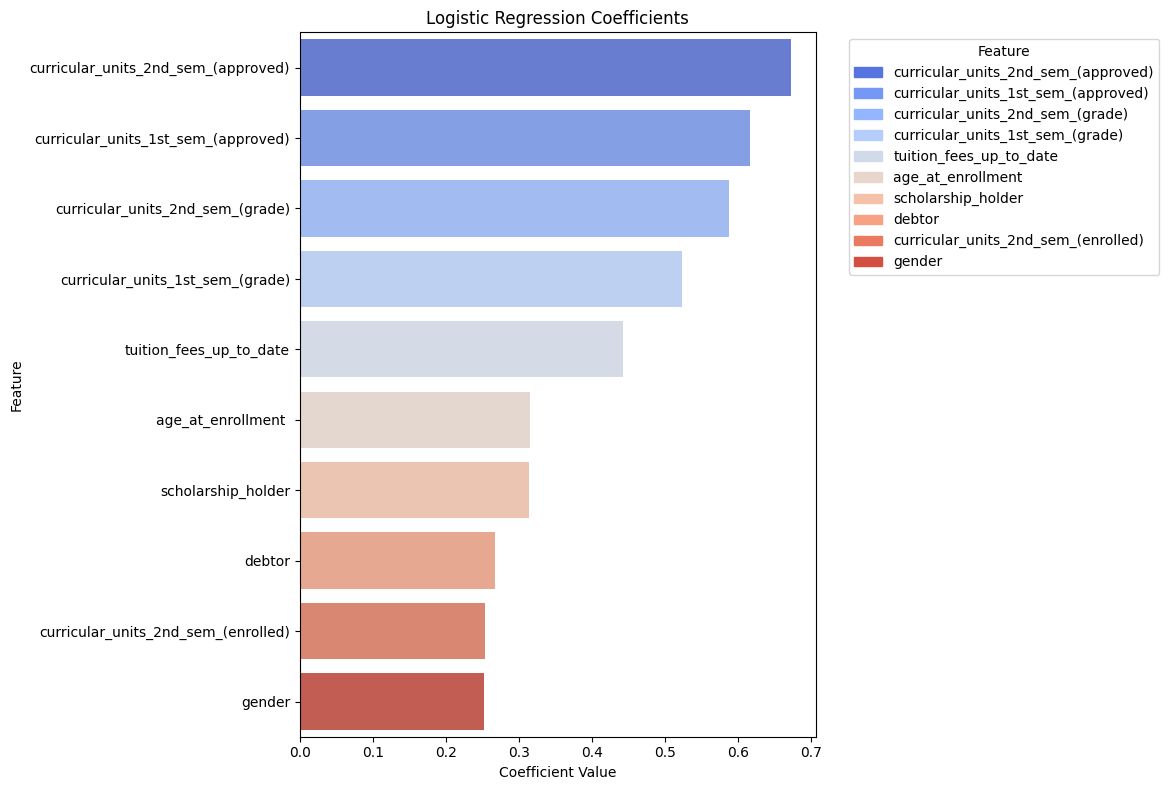

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided coefficients
coefficients = {
    'Feature': [
        'curricular_units_2nd_sem_(approved)', 'curricular_units_1st_sem_(approved)', 'curricular_units_2nd_sem_(grade)',
        'curricular_units_1st_sem_(grade)', 'tuition_fees_up_to_date', 'age_at_enrollment ', 'scholarship_holder', 'debtor', 'curricular_units_2nd_sem_(enrolled)', 'gender'
    ],
    'Coefficient': [
        0.672831, 0.616451, 0.587241, 0.523679, 0.442138, 0.315083, 0.313018, 0.267207 ,0.252826 ,0.251955
    ]
}

# Convert to DataFrame
coeff_df = pd.DataFrame(coefficients)

# Sort the DataFrame by the 'Coefficient' column in descending order
coeff_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
palette = sns.color_palette("coolwarm", len(coeff_df))
barplot = sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette=palette)

# Set the plot's title and labels
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Adding a legend with custom color patches
from matplotlib.patches import Patch
legend_patches = [Patch(color=palette[i], label=coeff_df['Feature'].iloc[i]) for i in range(len(coeff_df))]
plt.legend(handles=legend_patches, title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
